In [2]:
import torch 
import torch.utils.data as Data



In [36]:
BATCH_SIZE = 6

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)
print(x, y)

dataset=Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
# , num_workers=2
print(dataset)
print(enumerate(loader))

for epoch in range(3):
    count=0
    for step, (batch_x, batch_y) in enumerate(loader):
        count+=1
        print(count)
        print("Epoch: ", epoch, "| Step: ", step, " | batch x: ", batch_x.numpy(), " | batch y:",batch_y.numpy())

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])
1
Epoch:  0 | Step:  0  | batch x:  [6. 1. 4. 8. 7. 2.]  | batch y: [ 5. 10.  7.  3.  4.  9.]
2
Epoch:  0 | Step:  1  | batch x:  [ 9.  3. 10.  5.]  | batch y: [2. 8. 1. 6.]
1
Epoch:  1 | Step:  0  | batch x:  [ 9.  6. 10.  2.  4.  8.]  | batch y: [2. 5. 1. 9. 7. 3.]
2
Epoch:  1 | Step:  1  | batch x:  [5. 3. 1. 7.]  | batch y: [ 6.  8. 10.  4.]
1
Epoch:  2 | Step:  0  | batch x:  [7. 8. 2. 1. 4. 3.]  | batch y: [ 4.  3.  9. 10.  7.  8.]
2
Epoch:  2 | Step:  1  | batch x:  [ 5.  9.  6. 10.]  | batch y: [6. 2. 5. 1.]


In [53]:
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt 

x=torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

LR=0.01
BATCH_SIZE=32
EPOCH=12
# plt.scatter(x,y)
# plt.show()
# optimizer = torch.optim.SGD()
torch_dataset=Data.TensorDataset(x,y)
print(torch_dataset)
loader=Data.DataLoader(torch_dataset, batch_size=BATCH_SIZE, shuffle=True)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self, x):
        x=F.relu(self.hidden(x))   # input to the first hidden layer and bent the curve 
        x=self.predict(x)          # input the output from first layer to the second layer. 
        return x
# RMSprop, Momentum, Adam all better than SGD

0
1
2
3
4
5
6
7
8
9
10
11


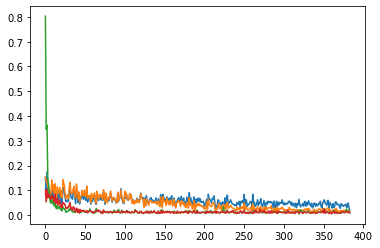

In [70]:
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets=[net_SGD ,net_Momentum , net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers=[opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func=torch.nn.MSELoss()
Losses=[[],[],[],[]]

for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, Losses):
            output = net(batch_x)
            loss=loss_func(output, batch_y)
#             print(loss)
            opt.zero_grad(); # clear gradient
            loss.backward()
            opt.step()
            l_his.append(loss.item())
for i, l_his in enumerate(Losses):
    plt.plot(l_his)
plt.show()